In [44]:
import pandas as pd

Exploring the Dataset

In [45]:
df1 = pd.read_csv("data/train_labels.csv")
df1.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [46]:
print("How many malignant and normal labels are in the dataset?")
print(f"following are the lable counts in the dataset:\n{df1['label'].value_counts()}")

How many malignant and normal labels are in the dataset?
following are the lable counts in the dataset:
label
0    130908
1     89117
Name: count, dtype: int64


<Axes: >

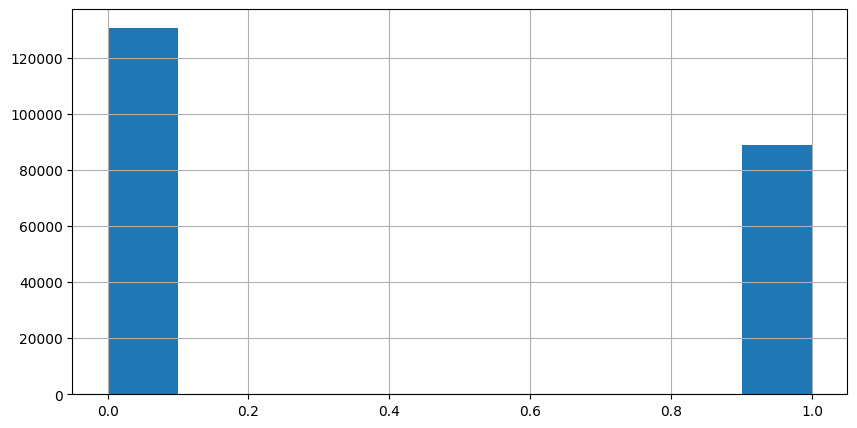

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

df1['label'].hist()

In [48]:
import matplotlib.pylab as plt
from PIL import Image, ImageDraw
import numpy as np
import os
%matplotlib inline

In [49]:
malignantids = df1.loc[df1['label']==1]['id'].values
malignantids

array(['c18f2d887b7ae4f6742ee445113fa1aef383ed77',
       'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da',
       '7f6ccae485af121e0b6ee733022e226ee6b0c65f', ...,
       '309210db7f424edbc22b2d13bf2fa27518b18f5c',
       'd4b854fe38b07fe2831ad73892b3cec877689576',
       'a81f84895ddcd522302ddf34be02eb1b3e5af1cb'], dtype=object)

In [50]:
#data path
path2train = 'data/train'

In [51]:
color = False

In [52]:
plt.rcParams['figure.figsize'] = (10,10)
plt.subplots_adjust(wspace = 0, hspace = 0)
nrows, ncols = 3,3

<Figure size 1000x1000 with 0 Axes>

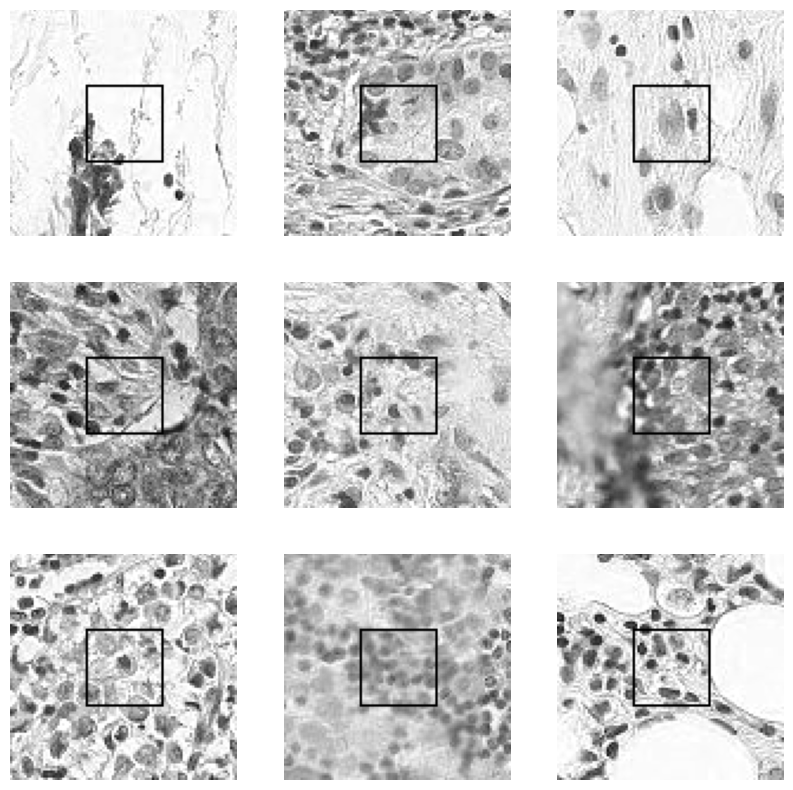

In [53]:
for i, id_ in enumerate(malignantids[:nrows*ncols]): #===> nrows = 3 and ncols = 3 so after mult =9 so from 0 to 9. Now malignant_ids? It is Ids of only malignant images.e.g "c18f2d887b7ae4f6742ee445113fa1aef383ed77" 
    # i is position and id_ is the data
    full_filenames = os.path.join(path2train, id_ + '.tif') # joining images and data directory path

    #load image
    img = Image.open(full_filenames) #opening individual images

    #draw a 32*32 rectangle 
    draw = ImageDraw.Draw(img)  #Pass the image on which you want to draw
    draw.rectangle(((32,32),(64,64)),outline = "green") # two points to define the bounding box. Sequence will be either [(x0, y0), (x1, y1)] or [x0, y0, x1, y1], where x1 >= x0 and y1 >= y0.
    plt.subplot(nrows, ncols, i+1) 
    if color is True:
        plt.imshow(np.array(img))
    else:
        plt.imshow(np.array(img)[:,:,0],cmap = 'gray')
    plt.axis('off')

In [54]:
print("image_shape:",np.array(img).shape)
print(f"pixel values range from {np.min(img)} to {np.max(img)}")

image_shape: (96, 96, 3)
pixel values range from 0 to 255


Creating a Custom Dataset

A traditional way of loading datasets would be to load all of them in numpy arrays, but we are dealing with large datasets so it would not be possible as we are short on memory.
Luckily, Pytorch Solves this problem. We can create a Dataset class by subclassing the Pytorch Dataset class. When creating make sure to define two essential functions:
1. __len__ it returns the length of the dataset
2. __getitem____ returns an image at the specified index.


In [55]:
from PIL import Image
import torch
from torch.utils.data import Dataset
import pandas as pd
import torchvision.transforms as transforms
import os

In [56]:
#fix the random seed for reproducibility
torch.manual_seed(0)

In [57]:
class histocancerDataset(Dataset):
    #overall flow
    #join data_dir and data_type(train or test) ==> get list of all images ==> join both the images name and path
    #join the labels file name with directory path ==> read it ==> set id as an index ==> get the labels from dataframe
    #define an attribute to get the size of dataset
    #define an attribute to get the item ==> open image, apply transform and then return both image and label
    def __init__(self, data_dir, transform, data_type = "train"):
        #joining data_dir and data_types
        path2train = os.path.join(data_dir, data_type)
        #getting the list of files in the joined directory
        filenames = os.listdir(path2train)
        #get the full paths of each image
        self.full_names = [os.path.join(path2train,f) for f in filenames]

        #Now work with labels
        #joining the path of labels file
        labels_filename = data_type + "_labels.csv"
        labels_csv = os.path.join(data_dir, labels_filename)
        #reading the csv
        labels_df = pd.read_csv(labels_csv)
        #setting the id as an index
        labels_df.set_index("id",inplace = True)

        #get the labels from the dataframe
        self.labels = [labels_df.loc[filename[:-4]].values[0] for filename in filenames]
        self.transform = transform

    def __len__(self):
        #return the size of dataset
        return len(self.full_names)
    def __getitem__(self, idx):

        #open image, apply transform and return
        image = Image.open(self.full_names[idx])
        image = self.transform(image)

        return image, self.labels[idx]
                

In [58]:
import torchvision.transforms as transforms
data_transformer = transforms.Compose([transforms.ToTensor()])

In [59]:
data_dir = "./data/"
histo_dataset = histocancerDataset(data_dir, data_transformer, "train")
print(len(histo_dataset))

220025


In [60]:
#load an image
img, label = histo_dataset[9]
print(img.shape, torch.min(img),torch.max(img))

torch.Size([3, 96, 96]) tensor(0.) tensor(1.)


In [61]:
img

tensor([[[0.7216, 0.6157, 0.5294,  ..., 0.8824, 0.8863, 0.8863],
         [0.7490, 0.5961, 0.5961,  ..., 0.8863, 0.8863, 0.8902],
         [0.6000, 0.6980, 0.5843,  ..., 0.8902, 0.8784, 0.8784],
         ...,
         [0.6627, 0.7686, 0.8627,  ..., 0.5725, 0.8588, 0.6157],
         [0.7686, 0.9647, 0.7333,  ..., 0.5804, 0.8588, 0.6745],
         [0.5804, 0.9647, 0.9373,  ..., 1.0000, 0.8000, 0.6941]],

        [[0.3255, 0.2392, 0.1843,  ..., 0.8863, 0.8902, 0.8902],
         [0.4510, 0.2980, 0.2980,  ..., 0.8824, 0.8824, 0.8863],
         [0.4235, 0.5020, 0.3490,  ..., 0.8706, 0.8706, 0.8706],
         ...,
         [0.2941, 0.4392, 0.5804,  ..., 0.3255, 0.5804, 0.3412],
         [0.3961, 0.6353, 0.4510,  ..., 0.3216, 0.5451, 0.3451],
         [0.2039, 0.6314, 0.6471,  ..., 0.7412, 0.4667, 0.3333]],

        [[0.6235, 0.5294, 0.4824,  ..., 0.8941, 0.8980, 0.8980],
         [0.7333, 0.5804, 0.5882,  ..., 0.9020, 0.9020, 0.9059],
         [0.6863, 0.7725, 0.6314,  ..., 0.8941, 0.8902, 0.

Splitting the dataset

In [62]:
from torch.utils.data import random_split

len_histo = len(histo_dataset)
len_train = int(0.8*len_histo)
len_val = len_histo - len_train

train_ds, val_ds = random_split(histo_dataset, [len_train,len_val])

print(f"train_dataset_length: {len(train_ds)}")
print(f"val_dataset_length: {len(val_ds)}")


train_dataset_length: 176020
val_dataset_length: 44005


In [63]:
for x, y in train_ds:
    print(x.shape,y)
    break

torch.Size([3, 96, 96]) 1


In [64]:
for x,y in val_ds:
    print(x.shape,y)
    break

torch.Size([3, 96, 96]) 1


In [65]:
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

In [66]:
def show(img,y,color = False):
    #convert tensor to numpy array
    npimg = img.numpy()
    #convert to h*w*c shape
    npimg_tr = np.transpose(npimg, (1,2,0))
    if color == False:
        npimg_tr = npimg_tr[:,:,0]
        plt.imshow(npimg_tr, interpolation = 'nearest',cmap = 'gray')
    else:
        #display image
        plt.imshow(npimg_tr,interpolation = 'nearest')
    plt.title("label:" + str(y))

In [67]:
grid_size = 4
rnd_inds = np.random.randint(0,len(train_ds),grid_size)
print(f"image indices: {rnd_inds}")

image indices: [ 43567 173685 117952 152315]


In [68]:
x_grid_train = [train_ds[i][0] for i in rnd_inds]
y_grid_train = [train_ds[i][1] for i in rnd_inds]

x_grid_train = utils.make_grid(x_grid_train, nrow = 4, padding = 2)
print(x_grid_train.shape)

torch.Size([3, 100, 394])


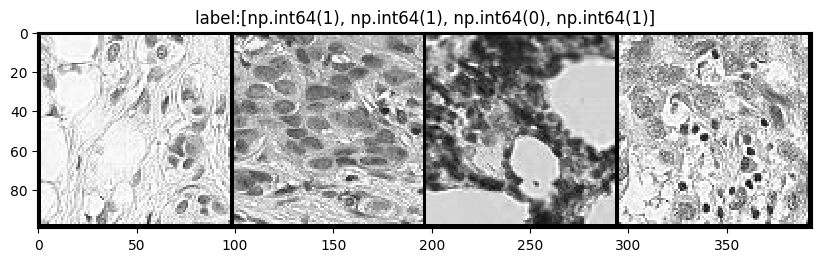

In [69]:
plt.rcParams['figure.figsize'] = (10.0,5)
show(x_grid_train,y_grid_train)

In [70]:
grid_size = 4
rnd_inds = np.random.randint(0, len(val_ds),grid_size)
print(f"image indices: {rnd_inds}")
x_grid_val = [val_ds[i][0] for i in range(grid_size)]
y_grid_val = [val_ds[i][1] for i in range(grid_size)]

image indices: [30403 32103 41993 20757]


In [71]:
x_grid_val = utils.make_grid(x_grid_val, nrow = 4, padding = 2)
print(x_grid_val.shape)

torch.Size([3, 100, 394])


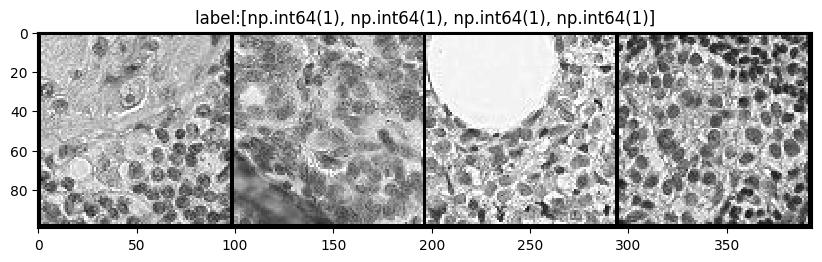

In [72]:
show(x_grid_val,y_grid_val)

Transforming the Data

In [73]:
train_transformer = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5),
    transforms.RandomRotation(45),
    transforms.RandomResizedCrop(96,scale = (0.8,1.0),ratio = (1.0,1.0)),
    transforms.ToTensor()
])

In [74]:
val_transformer = transforms.Compose([transforms.ToTensor()])

In [75]:
#overwrite the transform functions
train_ds.transform = train_transformer
val_ds.transform = val_transformer

Creating Data Loaders

In [76]:
from torch.utils.data import DataLoader
#two Dataloaders for the datasets
train_dl = DataLoader(train_ds, batch_size = 32, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = 64, shuffle = False)

In [77]:
#extract a batch from training data
for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break


torch.Size([32, 3, 96, 96])
torch.Size([32])


In [78]:
#extract a batch from training data
for x,y in val_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 3, 96, 96])
torch.Size([64])
